Data Loaded Successfully!
Variable Descriptions from dataset used:
                Open          Close           High            Low  \
count  619029.000000  619029.000000  619029.000000  619029.000000   
mean       83.023334      83.043305      83.778419      82.256200   
std        97.378769      97.388913      98.207735      96.507634   
min         1.620000       1.590000       1.690000       1.500000   
25%        40.220000      40.240800      40.620000      39.830000   
50%        62.590000      62.620000      63.150000      62.020000   
75%        94.370000      94.410000      95.180000      93.540000   
max      2044.000000    2049.000000    2067.990000    2035.110000   

             Volume  
count  6.190290e+05  
mean   4.321892e+06  
std    8.693671e+06  
min    1.010000e+02  
25%    1.070351e+06  
50%    2.082165e+06  
75%    4.284550e+06  
max    6.182376e+08  


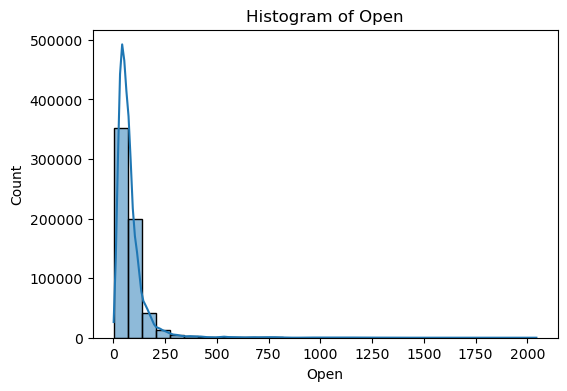

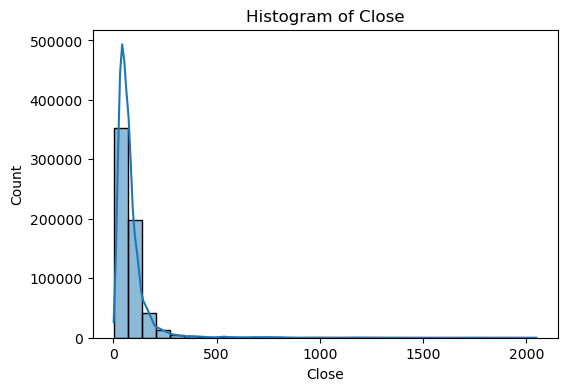

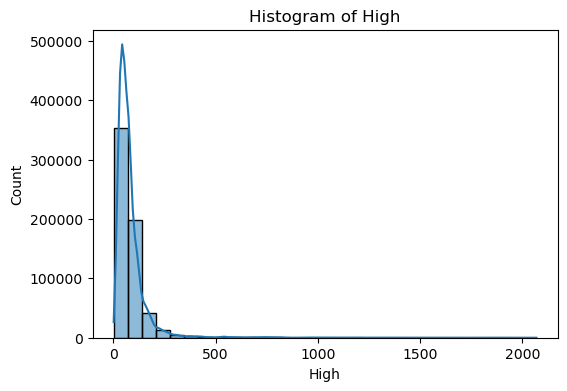

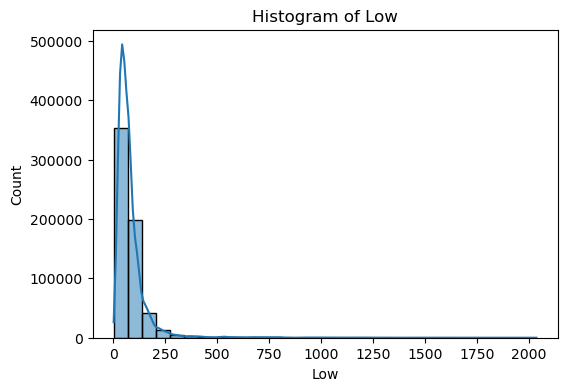

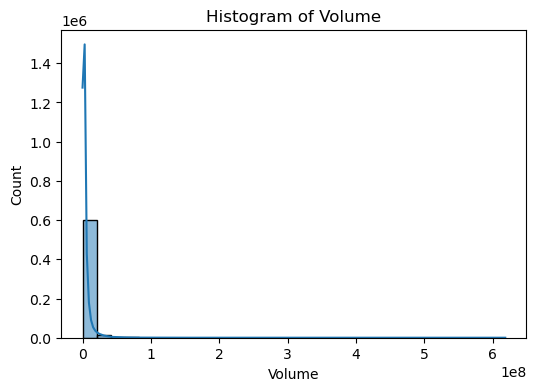

Outliers in Open: 38963
Outliers in Close: 38930
Outliers in High: 39020
Outliers in Low: 38891
Outliers in Volume: 59502


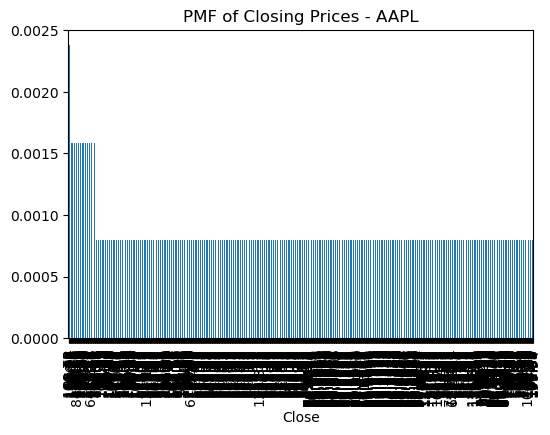

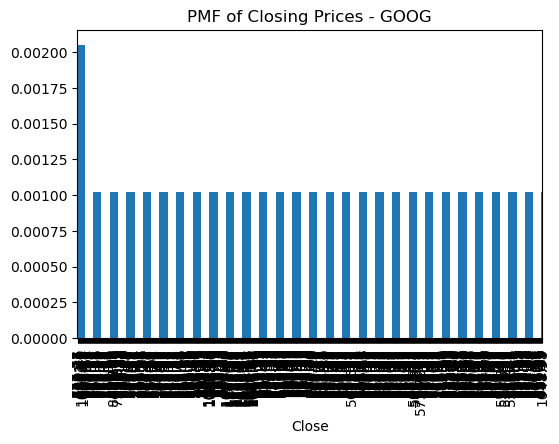

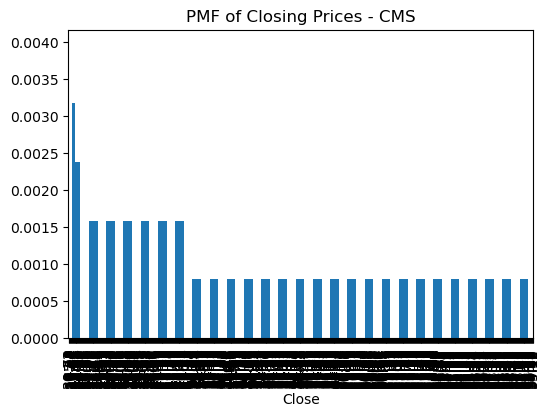

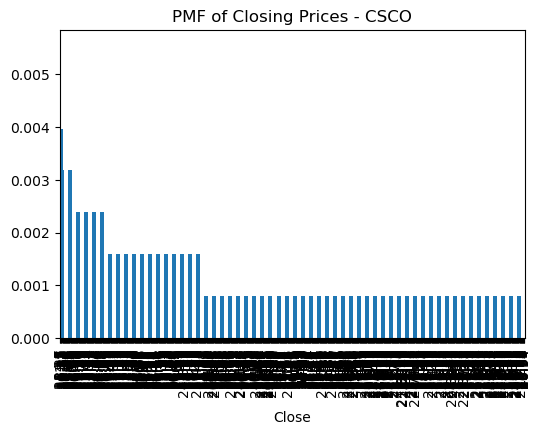

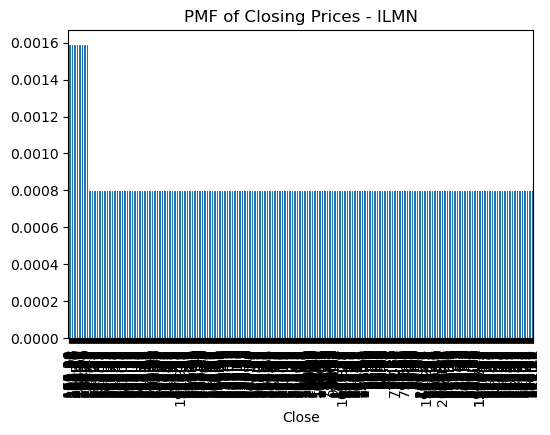

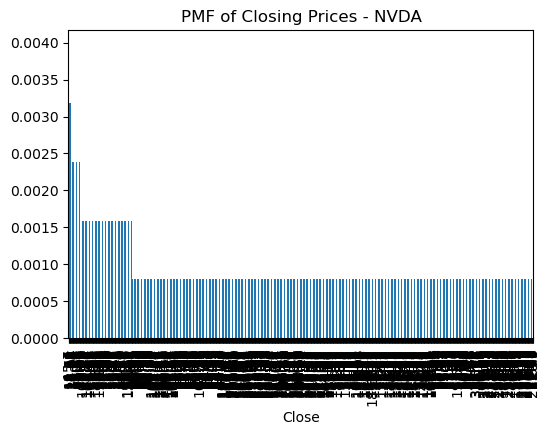

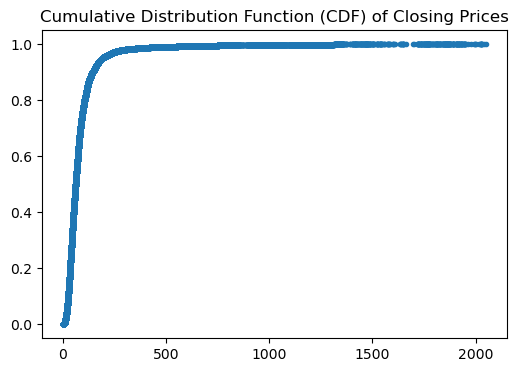

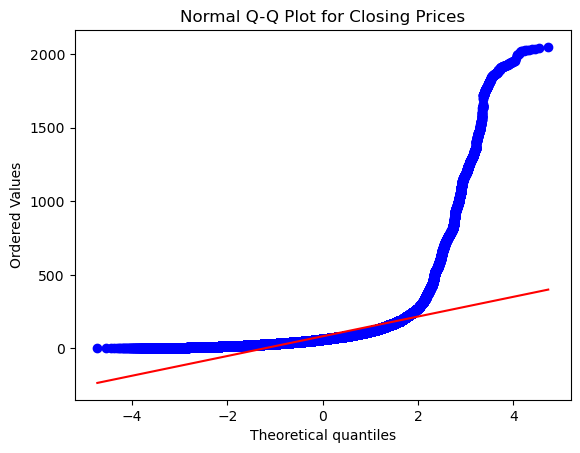

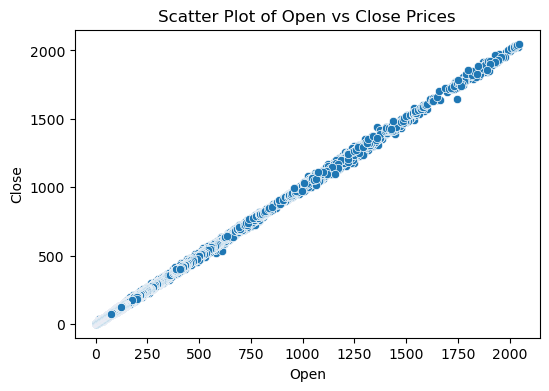

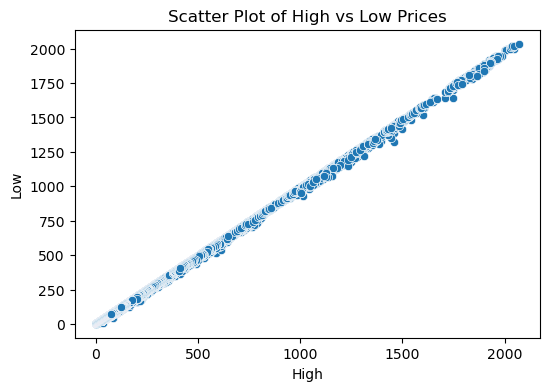

Pearson Correlation between Open and Close: 0.999871931742259
                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.097e+09
Date:                Sat, 01 Mar 2025   Prob (F-statistic):               0.00
Time:                        18:47:56   Log-Likelihood:            -6.4729e+05
No. Observations:              619029   AIC:                         1.295e+06
Df Residuals:                  619024   BIC:                         1.295e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

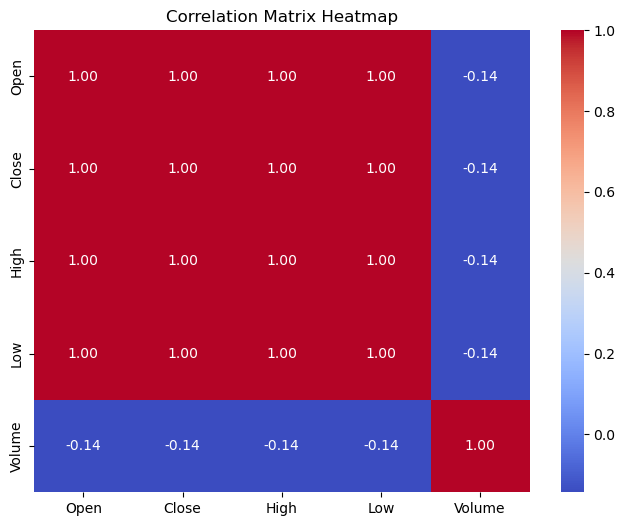

Regression Analysis Result:
         Coefficients  Intercept  R-Squared
Open   -5.555230e-01  -0.005817    0.99995
High    7.889903e-01  -0.005817    0.99995
Low     7.667548e-01  -0.005817    0.99995
Volume -4.584100e-11  -0.005817    0.99995


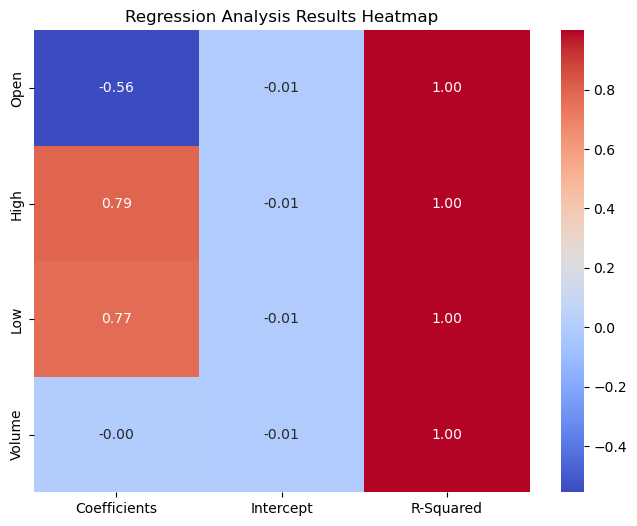

Hypothesis Analysis Result:
    T-Statistic       P-Value Conclusion
0    10.081291  6.712676e-24  Reject H0


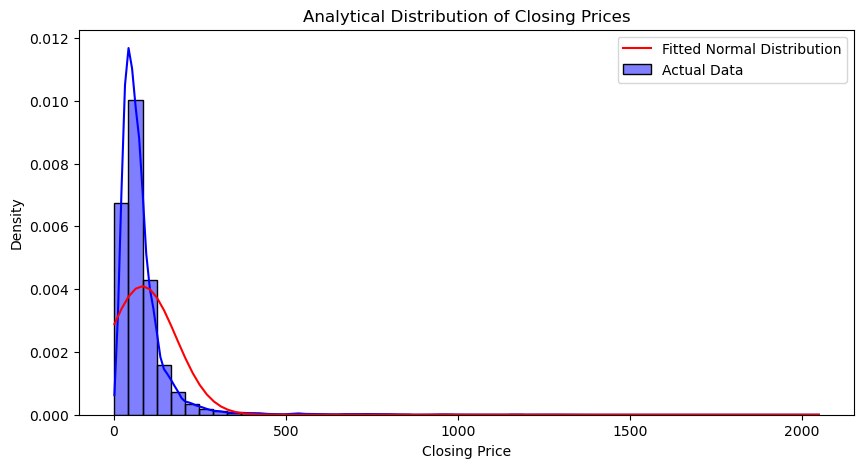

Analysis Completed successfully for Stock dataset!


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
import seaborn as sns

class StockDataAnalysisDataset:
    def __init__(self, file_name):
        self.file_path = file_name
        self.df = None
        self.selected_variables = ["Open", "Close", "High", "Low", "Volume"]

    #describe variable for dataset
    def describe_variables_for_dataset(self):
        descriptions_val = self.df[self.selected_variables].describe()
        print("Variable Descriptions from dataset used:")
        print(descriptions_val)

    #Load dataset
    def load_dataset(self):
        self.df = pd.read_csv(self.file_path)
        # renaming columns
        self.df.rename(columns={
            "date": "Date", "open": "Open", "high": "High",
            "low": "Low", "close": "Close", "volume": "Volume", "Name": "Ticker"
        }, inplace=True)
        self.df["Date"] = pd.to_datetime(self.df["Date"])
        self.df.dropna(inplace=True)
        print("Data Loaded Successfully!")

    #Plot histogram
    def plot_histograms_for_dataset(self):
        for var in self.selected_variables:
            plt.figure(figsize=(6,4))
            sns.histplot(self.df[var], bins=30, kde=True)
            plt.title(f'Histogram of {var}')
            plt.show()

    # Identify outliers for the variables
    def identify_outliers_for_dataset(self):
        for var in self.selected_variables:
            q1 = self.df[var].quantile(0.25)
            q3 = self.df[var].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            outliers = self.df[(self.df[var] < lower_bound) | (self.df[var] > upper_bound)]
            print(f"Outliers in {var}: {len(outliers)}")

    # compute PMF for AAPL and GOOGLe        
    def compute_pmf_for_dataset(self):
        scenarios = [
            self.df[self.df['Ticker'] == 'AAPL']['Close'],
            self.df[self.df['Ticker'] == 'GOOG']['Close'],
            self.df[self.df['Ticker'] == 'CMS']['Close'],
            self.df[self.df['Ticker'] == 'CSCO']['Close'],
            self.df[self.df['Ticker'] == 'ILMN']['Close'],
            self.df[self.df['Ticker'] == 'NVDA']['Close'],

        ]
        labels = ["AAPL", "GOOG","CMS","CSCO","ILMN","NVDA"]
        for i, scenario in enumerate(scenarios):
            pmf = scenario.value_counts(normalize=True)
            plt.figure(figsize=(6,4))
            pmf.plot(kind='bar')
            plt.title(f'PMF of Closing Prices - {labels[i]}')
            plt.show()

    # computation of Cumulative Distribution function
    def compute_cdf_for_dataset(self):
        sorted_data = np.sort(self.df['Close'])
        cdf = np.arange(len(sorted_data)) / float(len(sorted_data))
        plt.figure(figsize=(6,4))
        plt.plot(sorted_data, cdf, marker='.', linestyle='none')
        plt.title("Cumulative Distribution Function (CDF) of Closing Prices")
        plt.show()
    
    def analyze_distribution_for_dataset(self):
        stats.probplot(self.df['Close'], dist="norm", plot=plt)
        plt.title("Normal Q-Q Plot for Closing Prices")
        plt.show()
    
    def scatter_plots_for_dataset(self):
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=self.df['Open'], y=self.df['Close'])
        plt.title("Scatter Plot of Open vs Close Prices")
        plt.show()
        
        plt.figure(figsize=(6,4))
        sns.scatterplot(x=self.df['High'], y=self.df['Low'])
        plt.title("Scatter Plot of High vs Low Prices")
        plt.show()
    
    def compute_correlation_for_dataset(self):
        correlation, _ = pearsonr(self.df['Open'], self.df['Close'])
        print(f"Pearson Correlation between Open and Close: {correlation}")
    
    def regression_analysis_for_dataset(self):
        model = ols("Close ~ Open + High + Low + Volume", data=self.df).fit()
        print(model.summary())

    def correlation_analysis_for_dataset(self):
        """Computes Pearson correlation coefficients."""
        correlation_matrix = self.df[self.selected_variables].corr()
        print("Correlation Matrix:\n", correlation_matrix)
        plt.figure(figsize=(8, 6))
        sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Correlation Matrix Heatmap")
        plt.show()

    def linear_regression_analysis(self):
        """Performs regression analysis using Linear Regression."""
        X = self.df[["Open", "High", "Low", "Volume"]]
        y = self.df["Close"]

        self.model = LinearRegression()
        self.model.fit(X, y)
        r_squared = self.model.score(X, y)

        regression_results = {
            "Coefficients": self.model.coef_,
            "Intercept": self.model.intercept_,
            "R-Squared": r_squared
        }

        regression_df = pd.DataFrame(regression_results, index=["Open", "High", "Low", "Volume"])
        print("Regression Analysis Result:\n", regression_df)
        plt.figure(figsize=(8, 6))
        sns.heatmap(regression_df, annot=True, cmap="coolwarm", fmt=".2f")
        plt.title("Regression Analysis Results Heatmap")
        plt.show()

    def hypothesis_testing_for_dataset(self):
        """Performing hypothesis testing  compare mean Close and Open prices."""
        t_stat, p_value = stats.ttest_rel(self.df["Close"], self.df["Open"])

        hypothesis_results = pd.DataFrame({
            "T-Statistic": [t_stat],
            "P-Value": [p_value],
            "Conclusion": ["Reject H0" if p_value < 0.05 else "Fail to Reject H0"]
        })
        print("Hypothesis Analysis Result:\n", hypothesis_results)

    def plot_analytical_distribution_for_dataset(self):
        """Fits and plots an analytical normal distribution."""
        mu, sigma = stats.norm.fit(self.df["Close"])

        x = np.linspace(self.df["Close"].min(), self.df["Close"].max(), 100)
        pdf = stats.norm.pdf(x, mu, sigma)

        plt.figure(figsize=(10, 5))
        sns.histplot(self.df["Close"], bins=50, kde=True, stat="density", label="Actual Data", color="blue")
        plt.plot(x, pdf, 'r-', label="Fitted Normal Distribution")
        plt.xlabel("Closing Price")
        plt.ylabel("Density")
        plt.title("Analytical Distribution of Closing Prices")
        plt.legend()
        plt.show()    
    
    def run_all_analysis(self):
        self.load_dataset()
        self.describe_variables_for_dataset()
        self.plot_histograms_for_dataset()
        self.identify_outliers_for_dataset()
        self.compute_pmf_for_dataset()
        self.compute_cdf_for_dataset()
        self.analyze_distribution_for_dataset()
        self.scatter_plots_for_dataset()
        self.compute_correlation_for_dataset()
        self.regression_analysis_for_dataset()
        self.correlation_analysis_for_dataset()
        self.linear_regression_analysis()
        self.hypothesis_testing_for_dataset()
        self.plot_analytical_distribution_for_dataset()
        
        print("Analysis Completed successfully for Stock dataset!")

# Class initialization with the dataset
analysis_data = StockDataAnalysisDataset("all_stocks_5yr.csv")
analysis_data.run_all_analysis()
